In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from helper_functions import accuracy_fn , plot_decision_boundary

In [16]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multiclass data
X_blob , y_blob = make_blobs(n_samples = 1000 , n_features = NUM_FEATURES , centers = NUM_CLASSES , cluster_std = 1.5 , random_state = RANDOM_SEED)

X_blob , y_blob = torch.from_numpy(X_blob).type(torch.float) , torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train ,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob , y_blob , test_size = 0.2 , random_state=RANDOM_SEED) 

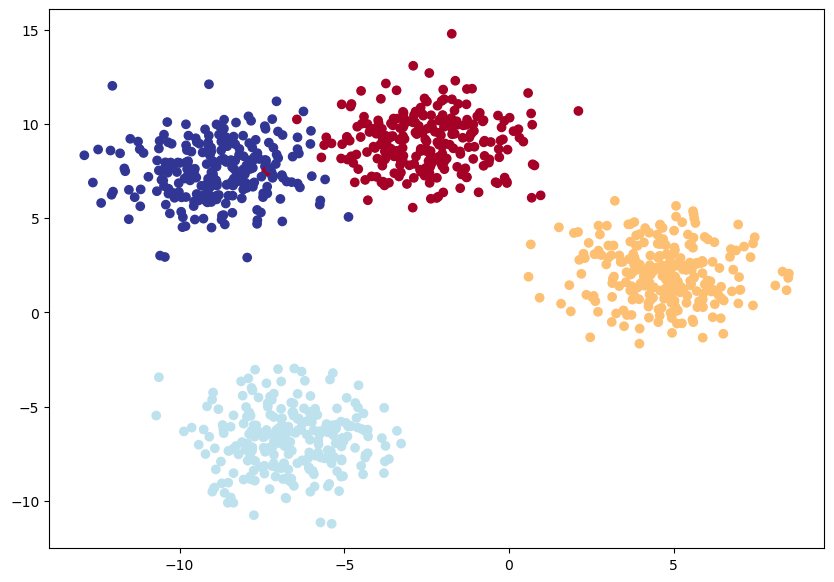

In [17]:
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0] , X_blob[:,1] , c = y_blob , cmap = plt.cm.RdYlBu)
plt.show()

In [35]:
# DEVICE AGNOSTIC CODE
device = "cuda" if torch.cuda.is_available() else "cpu"
X_blob_train ,X_blob_test = X_blob_train.to(device) , X_blob_test.to(device)
y_blob_train,y_blob_test = y_blob_train.to(device) , y_blob_test.to(device)

## CREATING MODEL

In [36]:
NUM_HIDDEN_UNIT = 8

model = nn.Sequential(
    nn.Linear(in_features=X_blob_train.shape[1] , out_features= NUM_HIDDEN_UNIT),
    nn.ReLU(),

    nn.Linear(in_features=NUM_HIDDEN_UNIT , out_features=NUM_HIDDEN_UNIT),
    nn.ReLU(),

    nn.Linear(in_features=NUM_HIDDEN_UNIT , out_features=NUM_CLASSES),
).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model.parameters() , lr = 0.01)

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model.train()

    y_logits = model(X_blob_train)

    y_preds = torch.softmax(y_logits , dim = 1).argmax(dim = 1)

    loss = loss_fn(y_logits , y_blob_train)

    acc = accuracy_fn(y_blob_train , y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_logits = model(X_blob_test)

        test_preds = torch.softmax(test_logits , dim = 1).argmax(dim = 1)

        test_loss = loss_fn(test_logits , y_blob_test)

        test_acc = accuracy_fn(y_blob_test , test_preds)

    if epoch%10 == 0:
        print(f"Epoch: {epochs} | Loss: {loss:.3f} , Acc: {acc:.3f}% | Test_Loss: {test_loss:.3f} , Test_Acc: {test_acc:.3f}%")


Epoch: 100 | Loss: 0.024 , Acc: 99.375% | Test_Loss: 0.013 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.023 , Acc: 99.375% | Test_Loss: 0.013 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.023 , Acc: 99.375% | Test_Loss: 0.012 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.023 , Acc: 99.500% | Test_Loss: 0.012 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.023 , Acc: 99.500% | Test_Loss: 0.011 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.022 , Acc: 99.500% | Test_Loss: 0.011 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.022 , Acc: 99.500% | Test_Loss: 0.011 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.022 , Acc: 99.500% | Test_Loss: 0.011 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.022 , Acc: 99.500% | Test_Loss: 0.010 , Test_Acc: 99.500%
Epoch: 100 | Loss: 0.022 , Acc: 99.500% | Test_Loss: 0.010 , Test_Acc: 99.500%


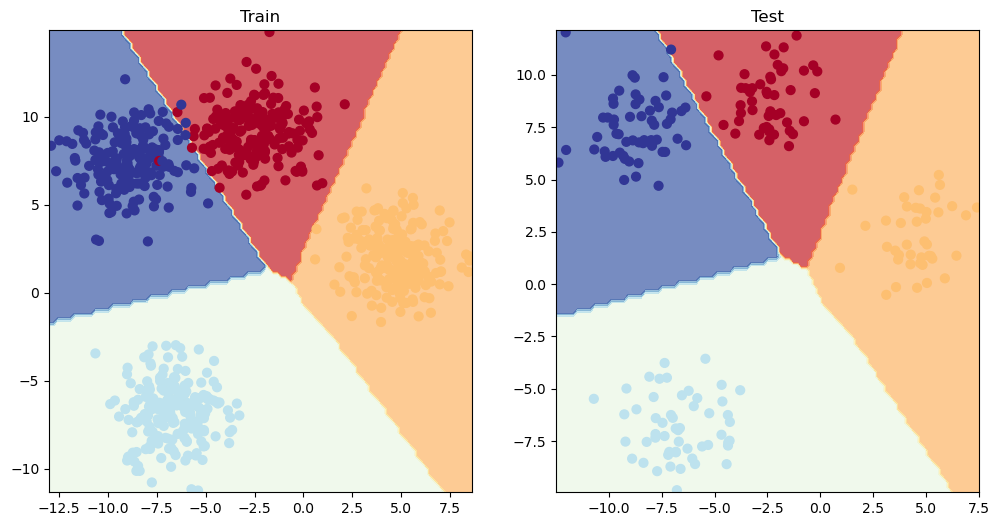

In [39]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train , y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model , X_blob_test , y_blob_test)